In [150]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

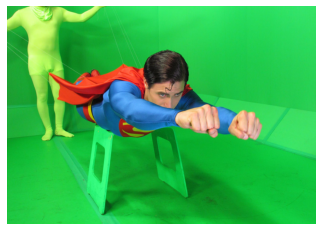

In [151]:
img = cv2.imread("./inputs/SuperMan.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [152]:
img.shape

(1444, 2048, 3)

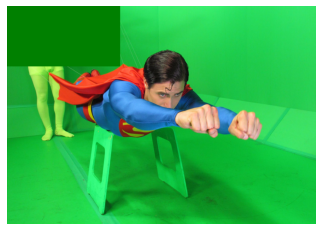

In [153]:
img[:400, :750, :] = (0, 128, 0)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

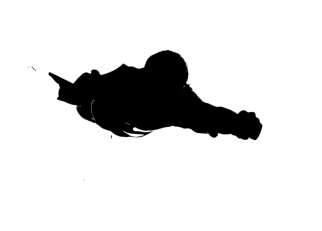

In [154]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_hue = np.array([35, 130, 0]) 
upper_hue = np.array([80, 255, 255])
mask = cv2.inRange(img_hsv, lower_hue, upper_hue)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

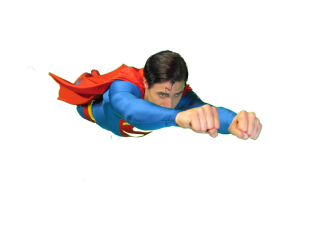

In [155]:
mask = mask//255
mask = 1 - mask
img = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
img[:, :, 3] = img[:, :, 3]*mask
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

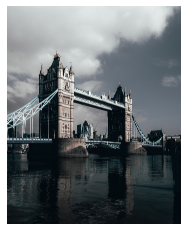

In [156]:
backgraond = cv2.imread("./inputs/sky.jpg")
backgraond = cv2.cvtColor(backgraond, cv2.COLOR_BGR2RGB)
plt.imshow(backgraond, cmap='gray')
plt.axis('off')
plt.show()

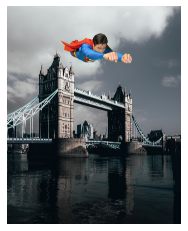

In [157]:
result = backgraond.copy()
alpha_s = img[:, :, 3] // 255
alpha_l = 1-alpha_s
for i in range(3):
    result[250:1694, 800:2848, i] = alpha_s*img[:, :, i] + alpha_l*backgraond[250:1694, 800:2848, i]
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave("./outputs/superman.png", result)